In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def convert_data_to_timeseries(input_file, column, verbose=False):
    # Load the input file
    data = np.loadtxt(input_file, delimiter=',')

    # Extract the start and end dates
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))

    if verbose:
        print("\nStart date =", start_date)
        print("End date =", end_date)

    # Create a date sequence with monthly intervals
    dates = pd.date_range(start_date, end_date, freq='M')

    # Convert the data into time series data
    data_timeseries = pd.Series(data[:,column], index=dates)

    if verbose:
        print("\nTime series data:\n", data_timeseries[:10])

    return data_timeseries


Maximum:
 first     99.82
second    99.97
dtype: float64

Minimum:
 first     0.07
second    0.00
dtype: float64

Mean:
 first     51.264529
second    49.695417
dtype: float64

Mean row-wise:
 1940-01-31    81.885
1940-02-29    41.135
1940-03-31    10.305
1940-04-30    83.545
1940-05-31    18.395
1940-06-30    16.695
1940-07-31    86.875
1940-08-31    42.255
1940-09-30    55.880
1940-10-31    34.720
Freq: M, dtype: float64

Correlation coefficients:
            first    second
first   1.000000  0.077607
second  0.077607  1.000000


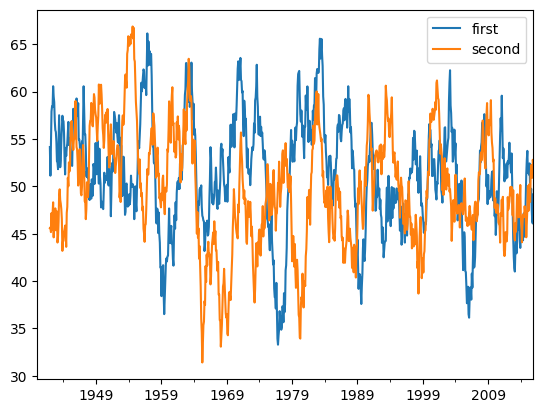

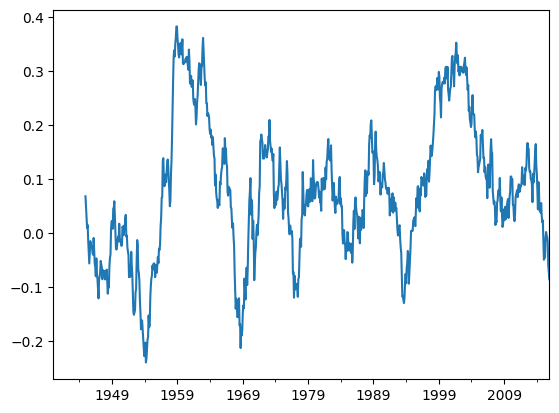

In [8]:
# Input file containing data
input_file = "/content/data_timeseries.txt"

# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

# Print max and min
print('\nMaximum:\n', dataframe.max())
print('\nMinimum:\n', dataframe.min())

# Print mean
print('\nMean:\n', dataframe.mean())
print('\nMean row-wise:\n', dataframe.mean(1)[:10])

# Plot rolling mean
dataframe.rolling(24).mean().plot()

# Print correlation coefficients
print('\nCorrelation coefficients:\n', dataframe.corr())

# Plot rolling correlation
plt.figure()
dataframe['first'].rolling(60).corr(dataframe['second']).plot()

plt.show()